# Business Case: Walmart - Confidence Interval and CLT

## What is Walmart?


Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide

## Objective

The objective is to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions and to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


## About Data

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.It has information of about 0.5 Million transactions during Black Friday throughout various years.


# **Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 151MB/s]


In [ ]:
walmart = pd.read_csv("walmart_data.csv?1641285094")

In [ ]:
walmart.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
walmart.shape

(550068, 10)

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
## Changing the Data Type of the columns to Category
for column in walmart.columns[:-1]:
  walmart[column] =  walmart[column].astype("category")
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
## Replacing Marital Status to Unmarried and Married
walmart['Marital_Status'] = walmart['Marital_Status'].replace({0:'Unmarried',1:'Married'})

In [ ]:
## Replacing Product Category names
d1 = {}
for i in walmart["Product_Category"].value_counts().index:
  d1[i] = f"Product {i}"
walmart['Product_Category'] = walmart['Product_Category'].replace(d1)

In [ ]:
## Replacing Occupation Category names
d2 = {}
for i in walmart["Occupation"].value_counts().index:
  d2[i] = f"Occupation {i}"
walmart['Occupation'] = walmart['Occupation'].replace(d2)

In [ ]:
walmart.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# **Statstical Analysis**

In [ ]:
walmart.describe(include = "category")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,Occupation 4,B,1,Unmarried,Product 5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


**Insights**

1. User_ID - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products.

2. Product_ID - Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller, with a maximum of 1,880 units sold.

3. Gender - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

4. Age - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future

5. Stay_In_Current_City_Years - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city

6. Marital_Status - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers.

In [ ]:
walmart.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


Insights

`The purchase amounts` vary widely, with the minimum recorded purchase being `$12` and the maximum reaching `$23961`. The `median` purchase amount of `$8047` is notably lower than the `mean` purchase amount of `$9264`, indicating a `right-skewed distribution` where a few high-value purchases pull up the mean italicized text

In [ ]:
walmart.duplicated().sum()

0

Insights

There are no duplicate entries in the dataset

In [ ]:
for columns in walmart.columns[:-1]:
  print(f"Unique values in {columns} column")
  print((walmart[columns].unique()))
  print("*"*150)

Unique values in User_ID column
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
******************************************************************************************************************************************************
Unique values in Product_ID column
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
******************************************************************************************************************************************************
Unique values in Gender column
['F', 'M']
Categories (2, object): ['F', 'M']
*******************************

# **Univariate Analysis**

[]

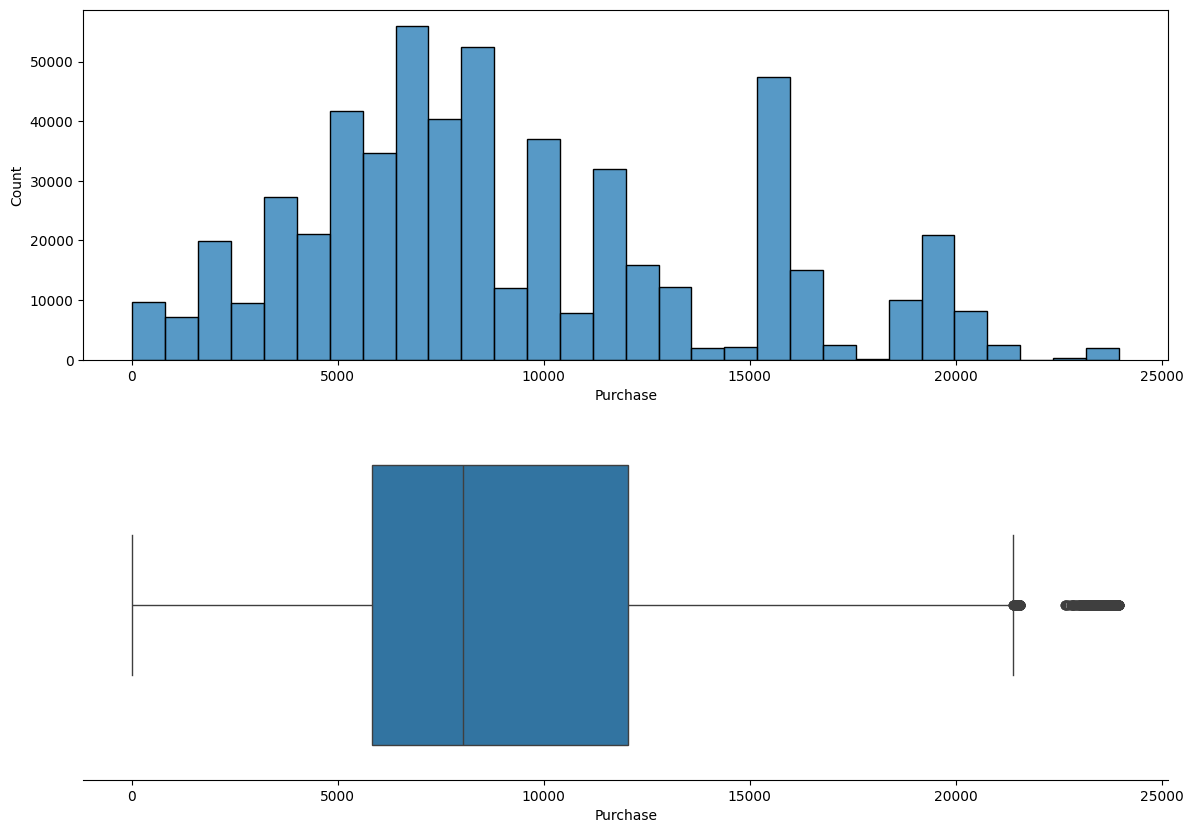

In [ ]:
##Purchase amount Distribution
fig, ax = plt.subplots(nrows=2, ncols = 1, figsize=(14, 10))
sns.histplot(data = walmart, x = "Purchase", bins = 30, ax = ax[0])
sns.boxplot(x = walmart["Purchase"], vert = False, patch_artist=True,ax = ax[1])
for axis in ["left","top","right"]:
  plt.gca().spines[axis].set_visible(False)
ax[1].set_yticks([])


**Distribution**

Data suggests that the majority of customers spent between `5,823 USD` and `12,054 USD`, with the `median` purchase amount being `8,047 USD`.    
    
The lower limit of `12 USD` while the upper limit of `21,399 USD` reveal significant variability in customer spending

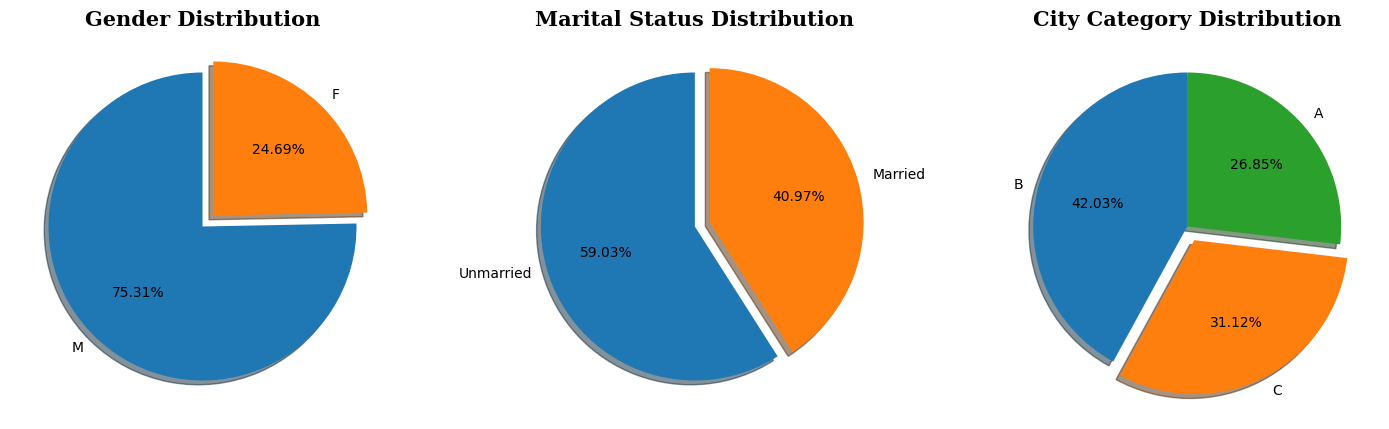

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(18, 5))
values_0 = walmart["Gender"].value_counts()
labels_0 = walmart["Gender"].value_counts().index
ax[0].pie(values_0, labels = labels_0, autopct = "%2.2f%%", shadow=True, startangle=90, explode = (0, 0.1))
ax[0].set_title('Gender Distribution',{'font':'serif', 'size':15,'weight':'bold'})

values_1 = walmart["Marital_Status"].value_counts()
labels_1 = walmart["Marital_Status"].value_counts().index
ax[1].pie(values_1, labels = labels_1, autopct = "%2.2f%%", shadow=True, startangle=90, explode = (0, 0.1))
ax[1].set_title('Marital Status Distribution',{'font':'serif', 'size':15,'weight':'bold'})

values_2 = walmart["City_Category"].value_counts()
labels_2 = walmart["City_Category"].value_counts().index
ax[2].pie(values_2, labels = labels_2, autopct = "%2.2f%%", shadow=True, startangle=90, explode = (0,0.1,0))
ax[2].set_title('City Category Distribution',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

###Insights

Gender Distribution** - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.

Marital Status** - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.

City Category** -  City B saw the most number of transactions followed by City C and City A respectively

In [ ]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,Occupation 10,A,2,Unmarried,Product 3,8370
1,1000001,P00248942,F,0-17,Occupation 10,A,2,Unmarried,Product 1,15200
2,1000001,P00087842,F,0-17,Occupation 10,A,2,Unmarried,Product 12,1422
3,1000001,P00085442,F,0-17,Occupation 10,A,2,Unmarried,Product 12,1057
4,1000002,P00285442,M,55+,Occupation 16,C,4+,Unmarried,Product 8,7969


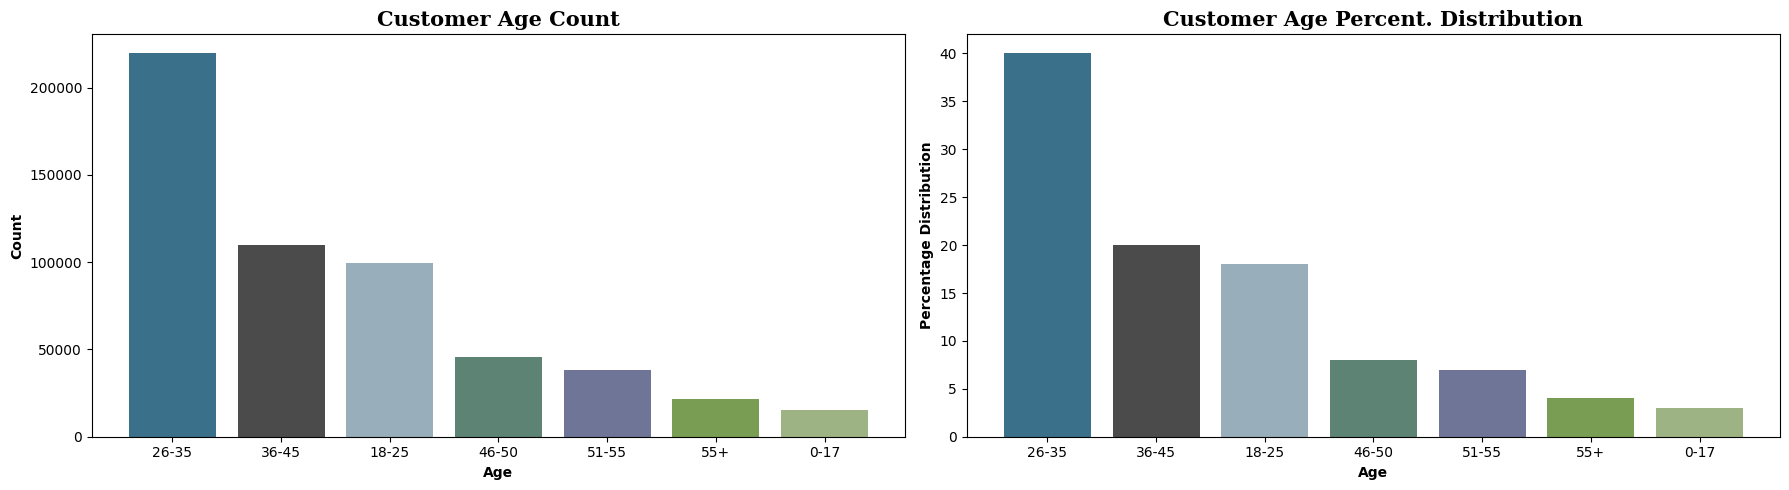

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 5))

value = walmart["Age"].value_counts()
index = walmart["Age"].value_counts().index
ax[0].bar(index, value, color = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
ax[0].set_title("Customer Age Count",{'font':'serif', 'size':15,'weight':'bold'})
ax[0].set_ylabel("Count", fontweight = "bold")
ax[0].set_xlabel("Age", fontweight = "bold")

age_info = []
for i in range(0,len(value)):
  x = [index[i], round((value[i]/value.sum())*100)]
  age_info.append(x)
age_info_df = pd.DataFrame(age_info)
ax[1].bar(age_info_df[0], age_info_df[1], color = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
ax[1].set_title('Customer Age Percent. Distribution',{'font':'serif', 'size':15,'weight':'bold'})
ax[1].set_ylabel("Percentage Distribution", fontweight = "bold")
ax[1].set_xlabel("Age", fontweight = "bold")

fig.tight_layout()



Insights

The age group of 26-35 represents the largest share of Walmart's Black Friday sales, accounting for 40% of the sales. This suggests that the young and middle-aged adults are the most active and interested in shopping for deals and discounts.

The 36-45 and 18-25 age groups are the second and third largest segments, respectively, with 20% and 18% of the sales. This indicates that Walmart has a diverse customer base that covers different life stages and preferences.

The 46-50, 51-55, 55+, and 0-17 age groups are the smallest customer segments, with less than 10% of the total sales each. This implies that Walmart may need to improve its marketing strategies and product offerings to attract more customers from these age groups, especially the seniors and the children.

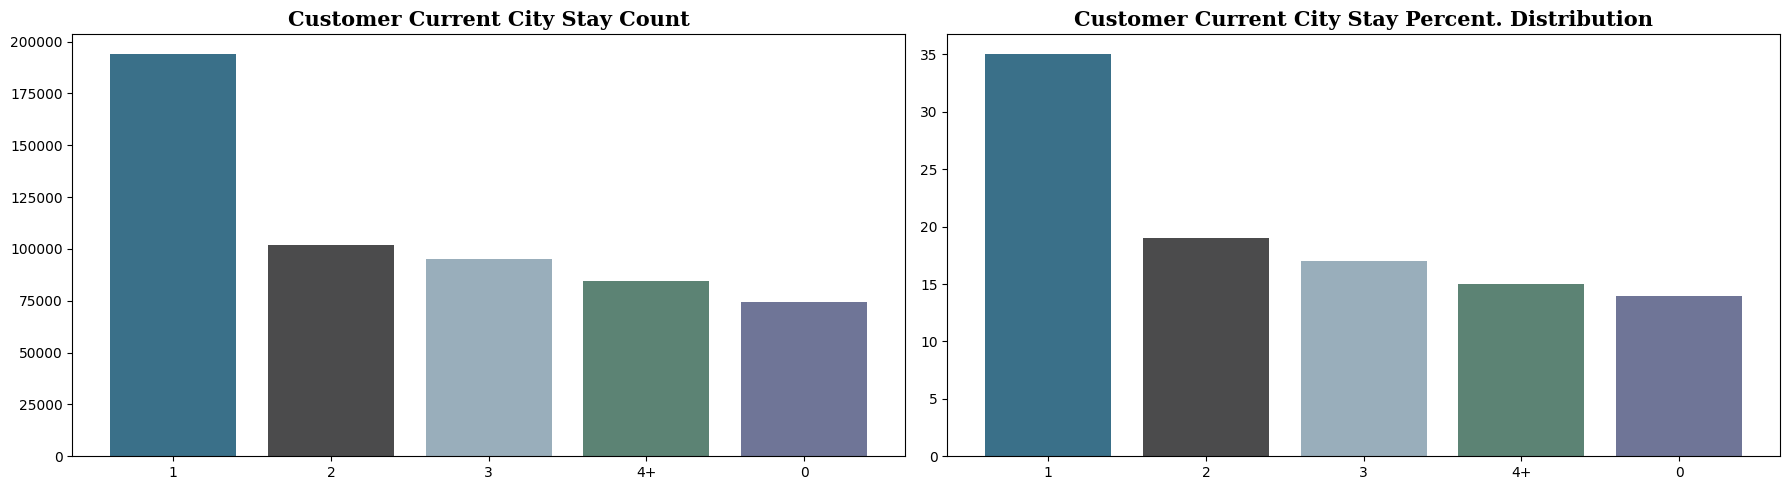

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 5))

value_1 = walmart["Stay_In_Current_City_Years"].value_counts()
index_1 = walmart["Stay_In_Current_City_Years"].value_counts().index
ax[0].bar(index_1, value_1, color = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
ax[0].set_title('Customer Current City Stay Count',{'font':'serif', 'size':15,'weight':'bold'})


city_info = []
for i in range(0,len(value_1)):
  x = [index_1[i], round((value_1[i]/value_1.sum())*100)]
  city_info.append(x)
city_info_df = pd.DataFrame(city_info)
ax[1].bar(city_info_df[0], city_info_df[1], color = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
ax[1].set_title('Customer Current City Stay Percent. Distribution',{'font':'serif', 'size':15,'weight':'bold'})

fig.tight_layout()

Insights

The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.

The majority of the customers (49%) have stayed in the current city for one year or less. This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping options.

4+ years category (14%) customers indicates that Walmart has a loyal customer base who have been living in the same city for a long time.

The percentage of customers decreases as the stay in the current city increases which suggests that Walmart may benefit from targeting long-term residents for loyalty programs and promotions.

Text(0, 0.5, 'Product Category')

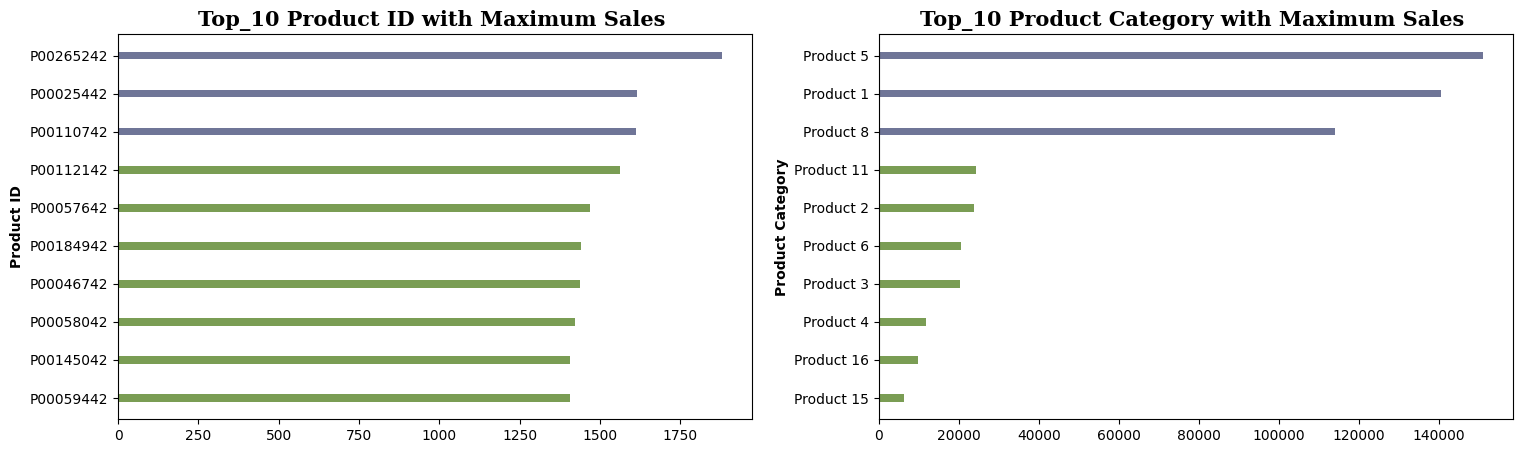

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(18, 5))

top_10_productID = walmart["Product_ID"].value_counts()[9::-1].reset_index()
ax[0].barh(top_10_productID["index"], top_10_productID["Product_ID"], color = ['#7A9D54','#7A9D54','#7A9D54','#7A9D54','#7A9D54','#7A9D54','#7A9D54',"#6F7597", "#6F7597",'#6F7597'],height = 0.2)
ax[0].set_title('Top_10 Product ID with Maximum Sales ',{'font':'serif', 'size':15,'weight':'bold'})
ax[0].set_ylabel("Product ID", fontweight = "bold")

top_10_Product_Category = walmart["Product_Category"].value_counts()[9::-1].reset_index()
ax[1].barh(top_10_Product_Category["index"], top_10_Product_Category["Product_Category"], color = ['#7A9D54','#7A9D54','#7A9D54','#7A9D54','#7A9D54','#7A9D54','#7A9D54', "#6F7597",'#6F7597','#6F7597'],height = 0.2)
ax[1].set_title('Top_10 Product Category with Maximum Sales ',{'font':'serif', 'size':15,'weight':'bold'})
ax[1].set_ylabel("Product Category", fontweight = "bold")



Insights

Top 10 Products Sold - The top-selling products during Walmart's Black Friday sales are characterized by a relatively small variation in sales numbers, suggesting that Walmart offers a variety of products that many different customers like to buy.

Top 10 Product Categories - Categories 5,1 and 8 have significantly outperformed other categories with combined Sales of nearly 75% of the total sales suggesting a strong preference for these products among customers.

Text(0, 0.5, 'Count')

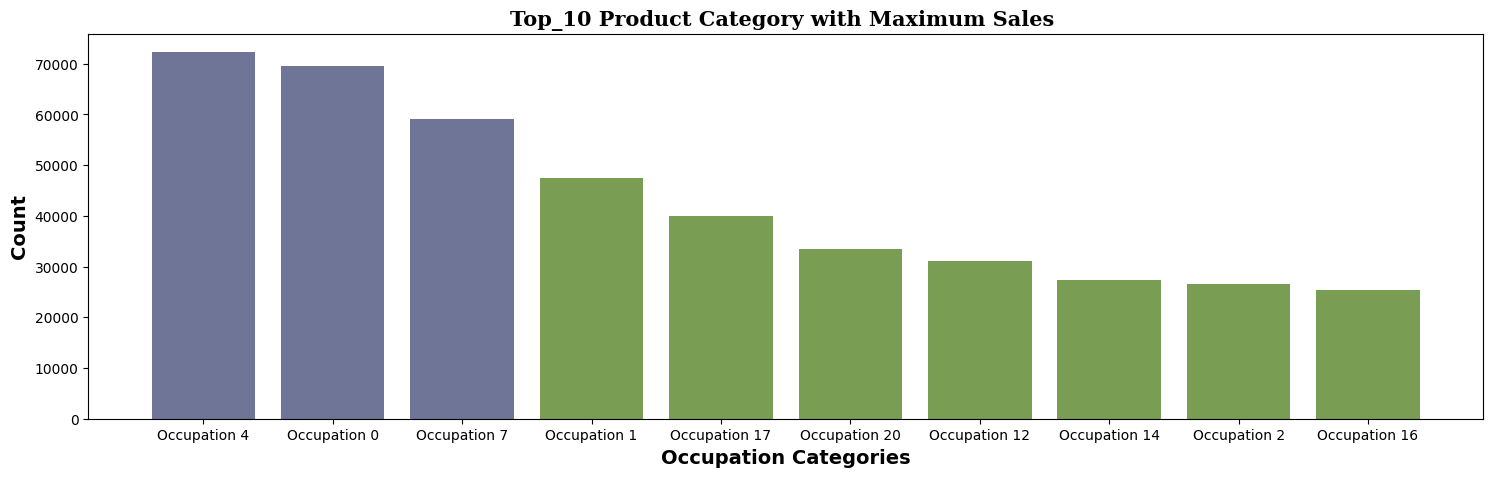

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols = 1, figsize=(18, 5))

top_10_Customers_Occupation = walmart["Occupation"].value_counts()[0:10].reset_index()
plt.bar(top_10_Customers_Occupation["index"], top_10_Customers_Occupation["Occupation"], color = ["#6F7597",'#6F7597','#6F7597','#7A9D54','#7A9D54','#7A9D54','#7A9D54','#7A9D54','#7A9D54','#7A9D54'])
ax.set_title('Top_10 Product Category with Maximum Sales ',{'font':'serif', 'size':15,'weight':'bold'})
plt.xlabel("Occupation Categories",fontweight='bold', fontsize=14)
plt.ylabel("Count",fontweight='bold',fontsize=14)


Insights

Customers with Occupation category 4,0 and 7 contributed significantly i.e. almost 37% of the total purchases suggesting that these occupations have a high demand for Walmart products or services, or that they have more disposable income to spend on Black Friday.

<ipython-input-23-692e3c9d6433>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = walmart, x = "Gender", y = "Purchase", palette = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
<ipython-input-23-692e3c9d6433>:3: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data = walmart, x = "Gender", y = "Purchase", palette = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
<ipython-input-23-692e3c9d6433>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = walmart, x = "Age", y = "Purchase", palette = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
<ipyth

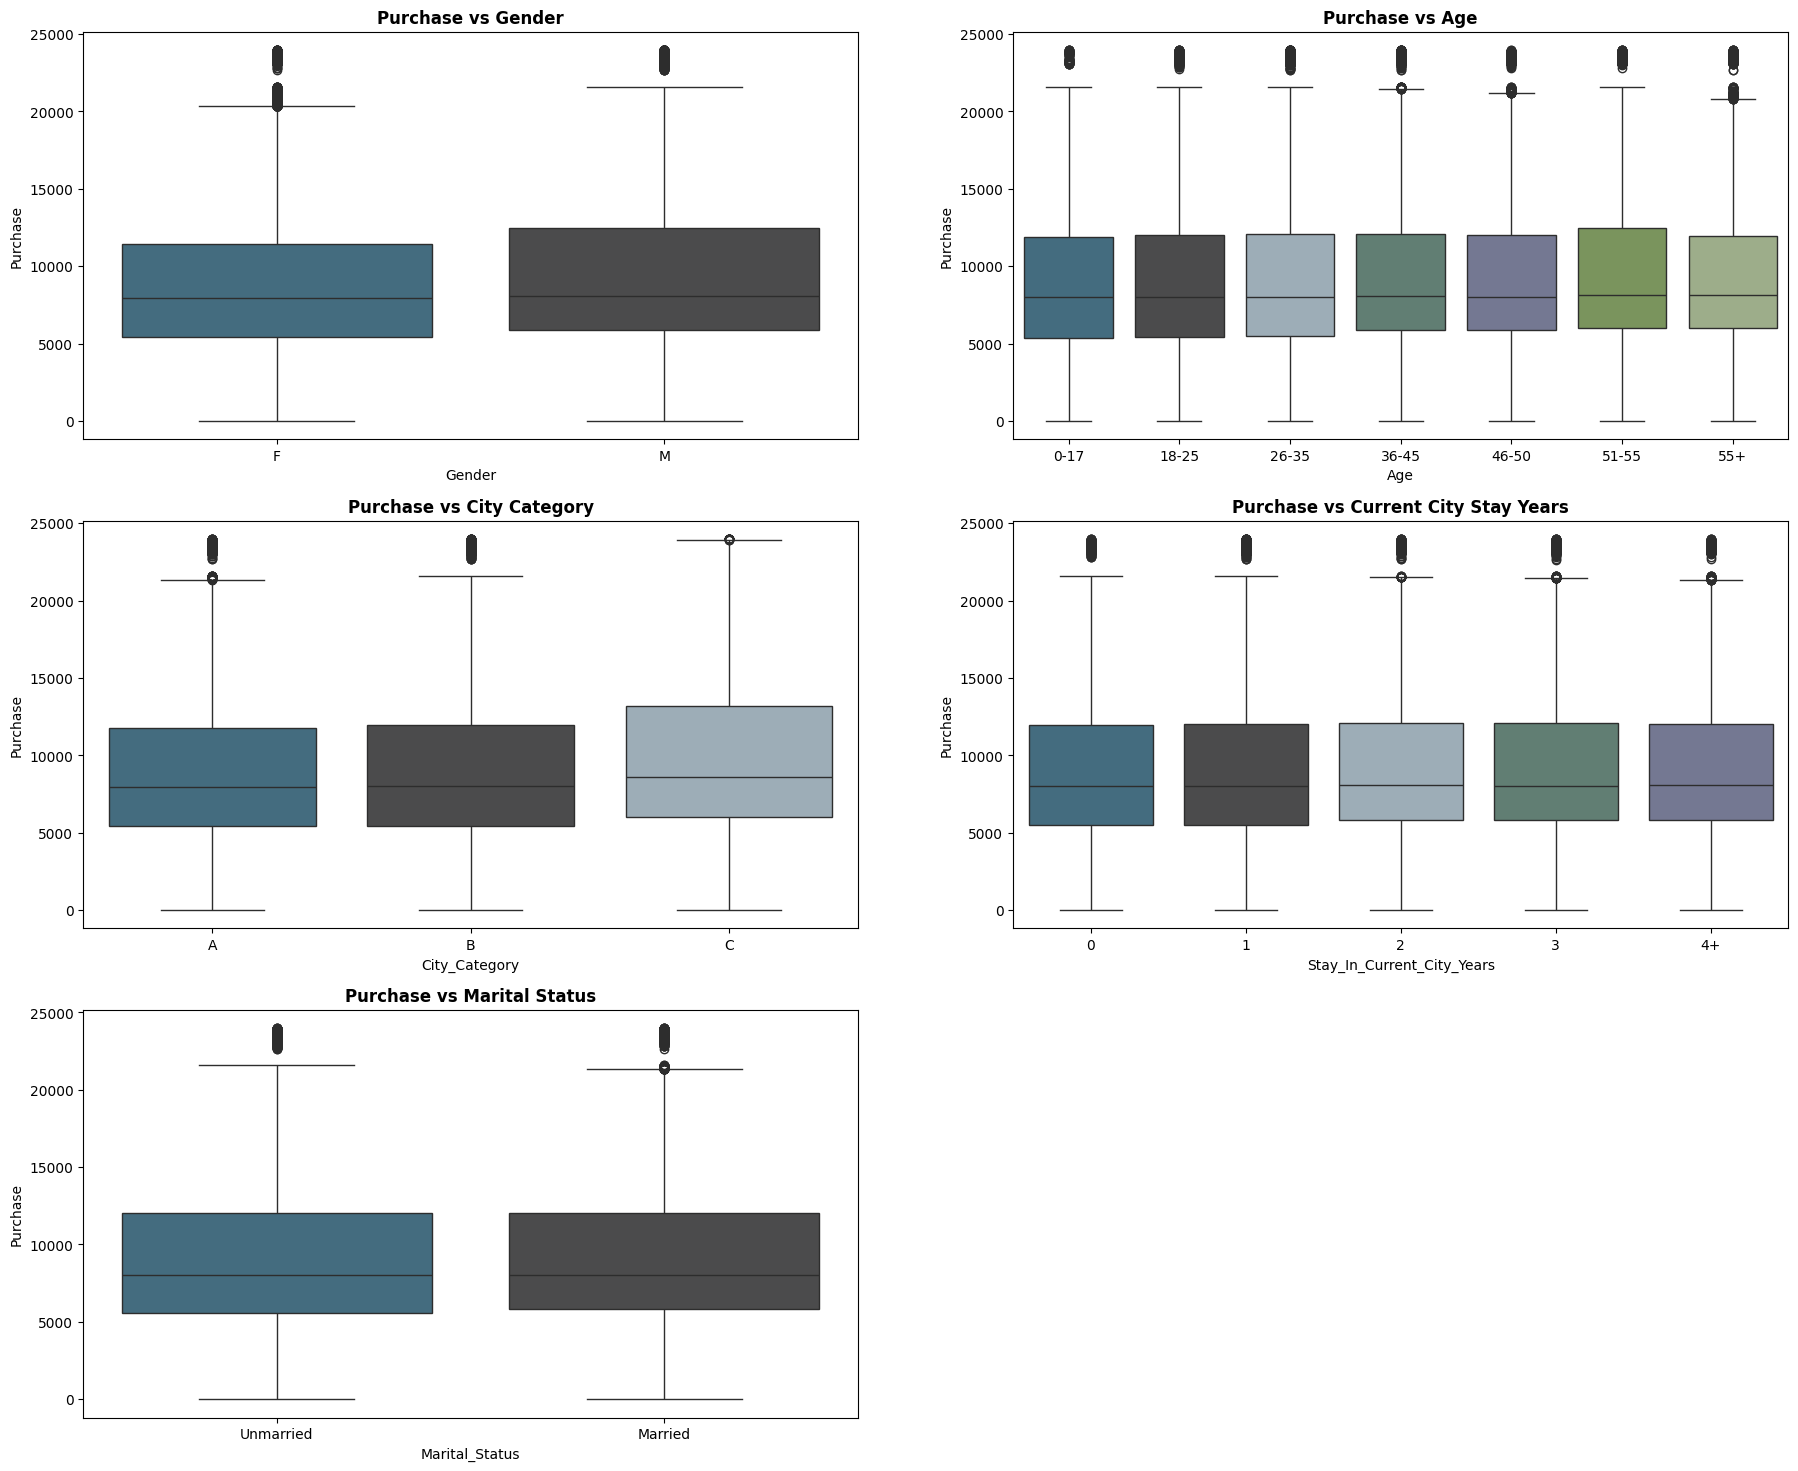

In [ ]:
plt.figure(figsize = (22,18))
plt.subplot(3,2,1)
sns.boxplot(data = walmart, x = "Gender", y = "Purchase", palette = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
plt.title("Purchase vs Gender", fontweight = "bold")
plt.subplot(3,2,2)
sns.boxplot(data = walmart, x = "Age", y = "Purchase", palette = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
plt.title("Purchase vs Age", fontweight = "bold")
plt.subplot(3,2,3)
sns.boxplot(data = walmart, x = "City_Category", y = "Purchase", palette = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
plt.title("Purchase vs City Category", fontweight = "bold")
plt.subplot(3,2,4)
sns.boxplot(data = walmart, x = "Stay_In_Current_City_Years", y = "Purchase", palette = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
plt.title("Purchase vs Current City Stay Years", fontweight = "bold")
plt.subplot(3,2,5)
sns.boxplot(data = walmart, x = "Marital_Status", y = "Purchase", palette = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384'])
plt.title("Purchase vs Marital Status", fontweight = "bold")
plt.subplots_adjust()

plt.show()

Insights

Out of all the variables analysed above, it's noteworthy that the purchase amount remains relatively stable regardless of the variable under consideration. As indicated in the data, the median purchase amount consistently hovers around 8,000 USD, regardless of the specific variable being examined.

# **Gender VS Purchase Amount**

Data Visualization

In [ ]:
#creating a df for purchase amount vs gender
temp = walmart.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

#renaming the gender
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.233,8735.0
1,Male,3909580100,414259,3.91,0.767,9438.0


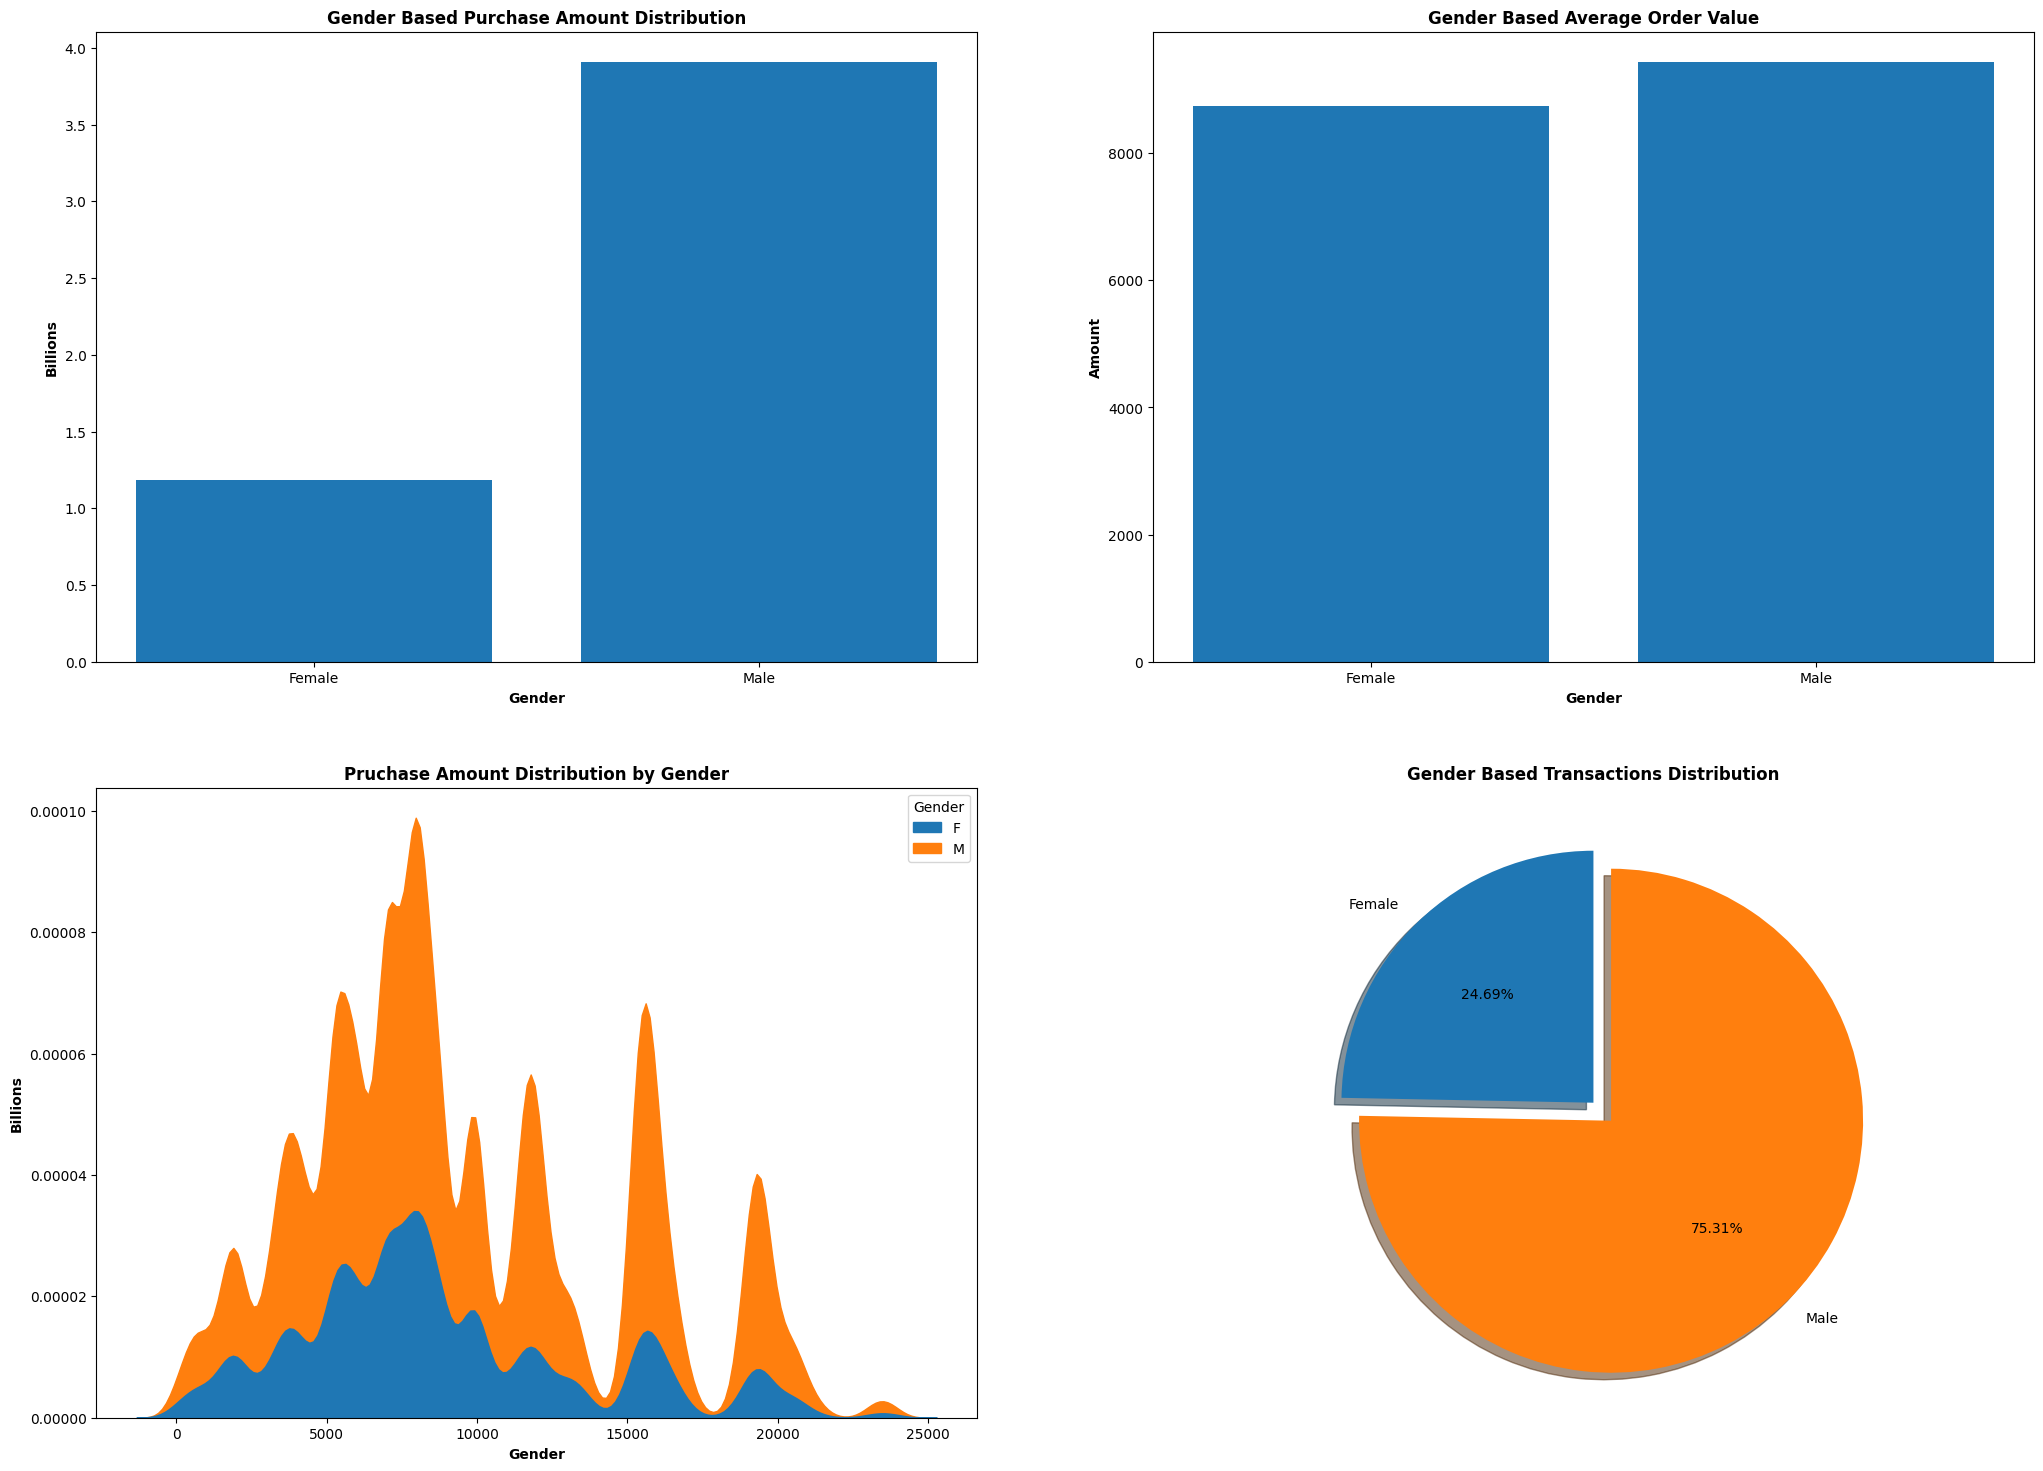

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (25,18))

plt.subplot(2,2,1)
plt.bar(temp["Gender"],temp["sum"]/10**9)
plt.title("Gender Based Purchase Amount Distribution", fontweight = "bold", fontsize = 12)
plt.ylabel("Billions",fontweight = "bold", fontsize = 10)
plt.xlabel("Gender",fontweight = "bold", fontsize = 10)

plt.subplot(2,2,2)
plt.bar(temp["Gender"],temp["per_purchase"])
plt.title("Gender Based Average Order Value", fontweight = "bold", fontsize = 12)
plt.ylabel("Amount",fontweight = "bold", fontsize = 10)
plt.xlabel("Gender",fontweight = "bold", fontsize = 10)

plt.subplot(2,2,3)
sns.kdeplot(data = walmart, x = 'Purchase', hue = 'Gender',fill = True, alpha = 1)
plt.title("Pruchase Amount Distribution by Gender", fontweight = "bold", fontsize = 12)
plt.ylabel("Billions",fontweight = "bold", fontsize = 10)
plt.xlabel("Gender",fontweight = "bold", fontsize = 10)

plt.subplot(2,2,4)
plt.pie(temp["count"], labels = temp["Gender"], autopct = "%2.2f%%", shadow=True, startangle=90, explode = (0, 0.1))
plt.title("Gender Based Transactions Distribution", fontweight = "bold", fontsize = 12)
plt.show()
plt.subplots_adjust()


Insights

Total Sales and Transactions Comparison:
The total purchase amount and number of transactions by male customers was more than three times the amount and transactions by female customers indicating that they had a more significant impact on the Black Friday sales.

Average Transaction Value:
The average purchase amount per transaction was slightly higher for male customers than female customers 9438 vs 8735.

Distribution of Purchase Amount:
As seen above, the purchase amount for both the genders is not normally distributed.

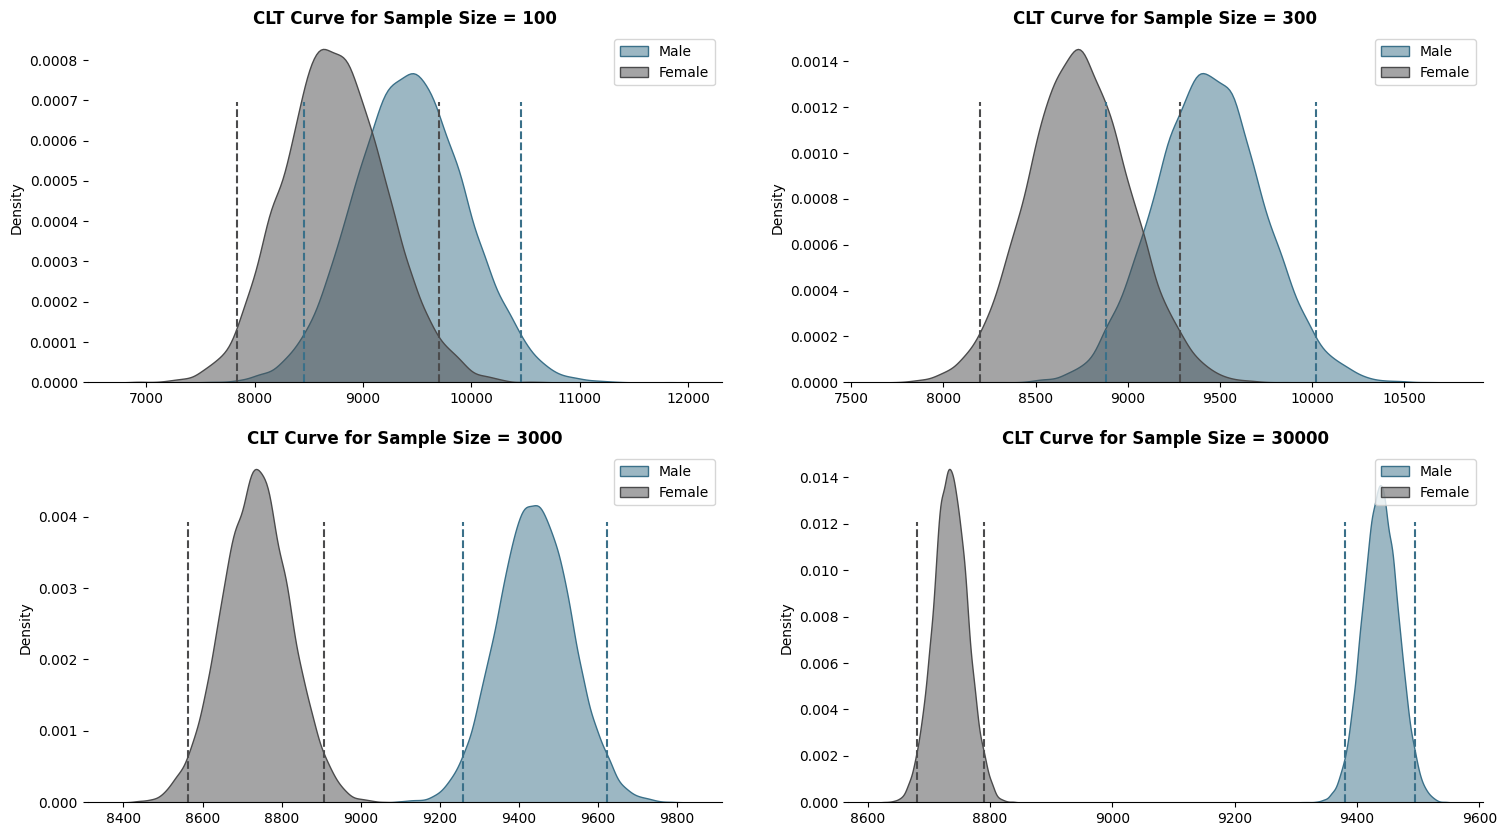

In [ ]:
##### Confidence Interval = 95
##### Sample Size = 100
plt.figure(figsize = (18,10))

samp_size = 100
ci = 95

walmart_male = walmart[walmart["Gender"] == "M"]["Purchase"]
walmart_female = walmart[walmart["Gender"] == "F"]["Purchase"]

male_samples_100 = []
female_samples_100 = []

for i in range(0,20000):
  male_bootstrapped_means = np.mean(np.random.choice(walmart_male, size= samp_size))
  female_bootstrapped_means = np.mean(np.random.choice(walmart_female, size= samp_size))


  male_samples_100.append(round(male_bootstrapped_means))
  female_samples_100.append(round(female_bootstrapped_means))

plt.subplot(2,2,1)
sns.kdeplot(male_samples_100,color ="#3A7089" ,fill = True, alpha = 0.5,label = 'Male')
sns.kdeplot(female_samples_100,color ="#4b4b4c" ,fill = True, alpha = 0.5,label = 'Female')
plt.legend()
plt.title(f'CLT Curve for Sample Size = {samp_size}',fontsize = 12, fontweight = "bold")
for axis in ["left","top","right"]:
  plt.gca().spines[axis].set_visible(False)

interval_male_100 = np.percentile(male_samples_100, [(100-ci)/2, (100+ci)/2])
interval_female_100 = np.percentile(female_samples_100, [(100-ci)/2, (100+ci)/2])

for i in interval_male_100:
  plt.axvline(x = i, ymax = 0.8, color ='#3A7089', linestyle = "--")
for i in interval_female_100:
  plt.axvline(x = i, ymax = 0.8, color ='#4b4b4c', linestyle = "--")


##### Confidence Interval = 95
##### Sample Size = 300

samp_size = 300
ci = 95

walmart_male = walmart[walmart["Gender"] == "M"]["Purchase"]
walmart_female = walmart[walmart["Gender"] == "F"]["Purchase"]

male_samples_300 = []
female_samples_300 = []

for i in range(0,20000):
  male_bootstrapped_means = np.mean(np.random.choice(walmart_male, size= samp_size))
  female_bootstrapped_means = np.mean(np.random.choice(walmart_female, size= samp_size))


  male_samples_300.append(round(male_bootstrapped_means))
  female_samples_300.append(round(female_bootstrapped_means))

plt.subplot(2,2,2)
sns.kdeplot(male_samples_300,color ="#3A7089" ,fill = True, alpha = 0.5,label = 'Male')
sns.kdeplot(female_samples_300,color ="#4b4b4c" ,fill = True, alpha = 0.5,label = 'Female')
plt.legend()
plt.title(f'CLT Curve for Sample Size = {samp_size}',fontsize = 12, fontweight = "bold")
for axis in ["left","top","right"]:
  plt.gca().spines[axis].set_visible(False)

interval_male_300 = np.percentile(male_samples_300, [(100-ci)/2, (100+ci)/2])
interval_female_300 = np.percentile(female_samples_300, [(100-ci)/2, (100+ci)/2])

for i in interval_male_300:
  plt.axvline(x = i, ymax = 0.8, color ='#3A7089', linestyle = "--")
for i in interval_female_300:
  plt.axvline(x = i, ymax = 0.8, color ='#4b4b4c', linestyle = "--")

##### Confidence Interval = 95
##### Sample Size = 3000
samp_size = 3000
ci = 95

walmart_male = walmart[walmart["Gender"] == "M"]["Purchase"]
walmart_female = walmart[walmart["Gender"] == "F"]["Purchase"]

male_samples_3000 = []
female_samples_3000 = []

for i in range(0,20000):
  male_bootstrapped_means = np.mean(np.random.choice(walmart_male, size= samp_size))
  female_bootstrapped_means = np.mean(np.random.choice(walmart_female, size= samp_size))


  male_samples_3000.append(round(male_bootstrapped_means))
  female_samples_3000.append(round(female_bootstrapped_means))

plt.subplot(2,2,3)
sns.kdeplot(male_samples_3000,color ="#3A7089" ,fill = True, alpha = 0.5,label = 'Male')
sns.kdeplot(female_samples_3000,color ="#4b4b4c" ,fill = True, alpha = 0.5,label = 'Female')
plt.legend()
plt.title(f'CLT Curve for Sample Size = {samp_size}',fontsize = 12, fontweight = "bold")
for axis in ["left","top","right"]:
  plt.gca().spines[axis].set_visible(False)

interval_male_3000 = np.percentile(male_samples_3000, [(100-ci)/2, (100+ci)/2])
interval_female_3000 = np.percentile(female_samples_3000, [(100-ci)/2, (100+ci)/2])

for i in interval_male_3000:
  plt.axvline(x = i, ymax = 0.8, color ='#3A7089', linestyle = "--")
for i in interval_female_3000:
  plt.axvline(x = i, ymax = 0.8, color ='#4b4b4c', linestyle = "--")



##### Confidence Interval = 95
##### Sample Size = 30000

samp_size = 30000
ci = 95

walmart_male = walmart[walmart["Gender"] == "M"]["Purchase"]
walmart_female = walmart[walmart["Gender"] == "F"]["Purchase"]

male_samples_30000 = []
female_samples_30000 = []

for i in range(0,20000):
  male_bootstrapped_means = np.mean(np.random.choice(walmart_male, size= samp_size))
  female_bootstrapped_means = np.mean(np.random.choice(walmart_female, size= samp_size))


  male_samples_30000.append(round(male_bootstrapped_means))
  female_samples_30000.append(round(female_bootstrapped_means))

plt.subplot(2,2,4)
sns.kdeplot(male_samples_30000,color ="#3A7089" ,fill = True, alpha = 0.5,label = 'Male')
sns.kdeplot(female_samples_30000,color ="#4b4b4c" ,fill = True, alpha = 0.5,label = 'Female')
plt.legend()
plt.title(f'CLT Curve for Sample Size = {samp_size}',fontsize = 12, fontweight = "bold")
for axis in ["left","top","right"]:
  plt.gca().spines[axis].set_visible(False)

interval_male_30000 = np.percentile(male_samples_30000, [(100-ci)/2, (100+ci)/2])
interval_female_30000 = np.percentile(female_samples_30000, [(100-ci)/2, (100+ci)/2])

for i in interval_male_30000:
  plt.axvline(x = i, ymax = 0.8, color ='#3A7089', linestyle = "--")
for i in interval_female_30000:
  plt.axvline(x = i, ymax = 0.8, color ='#4b4b4c', linestyle = "--")

In [ ]:
male_100_left , male_100_right = interval_male_100
female_100_left , female_100_right = interval_female_100

male_300_left , male_300_right = interval_male_300
female_300_left , female_300_right = interval_female_300

male_3000_left , male_3000_right = interval_male_3000
female_3000_left , female_3000_right = interval_female_3000

male_30000_left , male_30000_right = interval_male_30000
female_30000_left , female_30000_right = interval_female_30000

print("*"*100)
print("Sample Size 100")
print("*"*100)
print(f"Confidence Interval Male = {male_100_left} - {male_100_right.round(0)}")
print(f"Range = {(male_100_right - male_100_left).round(0)}")
print("-"*50)
print(f"Confidence Interval Female = {female_100_left} - {female_100_right}")
print(f"Range = {female_100_right - female_100_left}")

print("\n\n")

print("*"*100)
print("Sample Size 300")
print("*"*100)
print(f"Confidence Interval Male = {male_300_left} - {male_300_right.round(0)}")
print(f"Range = {(male_300_right - male_300_left).round(0)}")
print("-"*50)
print(f"Confidence Interval Female = {female_300_left} - {female_300_right}")
print(f"Range = {female_300_right - female_300_left}")

print("\n\n")

print("*"*100)
print("Sample Size 3000")
print("*"*100)
print(f"Confidence Interval Male = {male_3000_left} - {male_3000_right.round(0)}")
print(f"Range = {(male_3000_right - male_3000_left).round(0)}")
print("-"*50)
print(f"Confidence Interval Female = {female_3000_left} - {female_3000_right}")
print(f"Range = {female_3000_right - female_3000_left}")

print("\n\n")

print("*"*100)
print("Sample Size 30000")
print("*"*100)
print(f"Confidence Interval Male = {male_30000_left} - {male_30000_right.round(0)}")
print(f"Range = {(male_30000_right - male_30000_left).round(0)}")
print("-"*50)
print(f"Confidence Interval Female = {female_30000_left} - {female_30000_right}")
print(f"Range = {female_30000_right - female_30000_left}")


****************************************************************************************************
Sample Size 100
****************************************************************************************************
Confidence Interval Male = 8454.0 - 10456.0
Range = 2002.0
--------------------------------------------------
Confidence Interval Female = 7841.0 - 9699.0
Range = 1858.0



****************************************************************************************************
Sample Size 300
****************************************************************************************************
Confidence Interval Male = 8880.0 - 10021.0
Range = 1141.0
--------------------------------------------------
Confidence Interval Female = 8199.0 - 9282.0
Range = 1083.0



****************************************************************************************************
Sample Size 3000
****************************************************************************************************

1. Sample Size

The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals

From the above analysis, we can see that except for the Sample Size of 100, the confidence interval do not overlap as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.
3. Population Average

We are 95% confident that the true population average for males falls between 9,393 and 9,483, and for females, it falls between 8,692 and 8,777.
4. Women spend less

Men tend to spend more money per transaction on average than women, as the upper bounds of the confidence intervals for men are consistently higher than those for women across different sample sizes.
5. How can Walmart leverage this conclusion to make changes or improvements?
5.1. Segmentation Opportunities

Walmart can create targeted marketing campaigns, loyalty programs, or product bundles to cater to the distinct spending behaviors of male and female customers. This approach may help maximize revenue from each customer segment.

**Pricing Strategies**

Based on the above data of average spending per transaction by gender, they might adjust pricing or discount strategies to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.


# **Marital Status VS Purchase Amount**

In [ ]:
#creating a df for purchase amount vs marital status
temp = walmart.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,Unmarried,3008927447,324731,3.01,0.59,9266.0
1,Married,2086885295,225337,2.09,0.41,9261.0


**Insights**

1. Total Sales and Transactions Comparison

The total purchase amount and number of transactions by Unmarried customers was more than 20% the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.
2. Average Transaction Value

The average purchase amount per transaction was almost similar for married and unmarried customers 9261 vs 9266.
3. Distribution of Purchase Amount

As seen above, the purchase amount for both married and unmarried customers is not normally distributed.

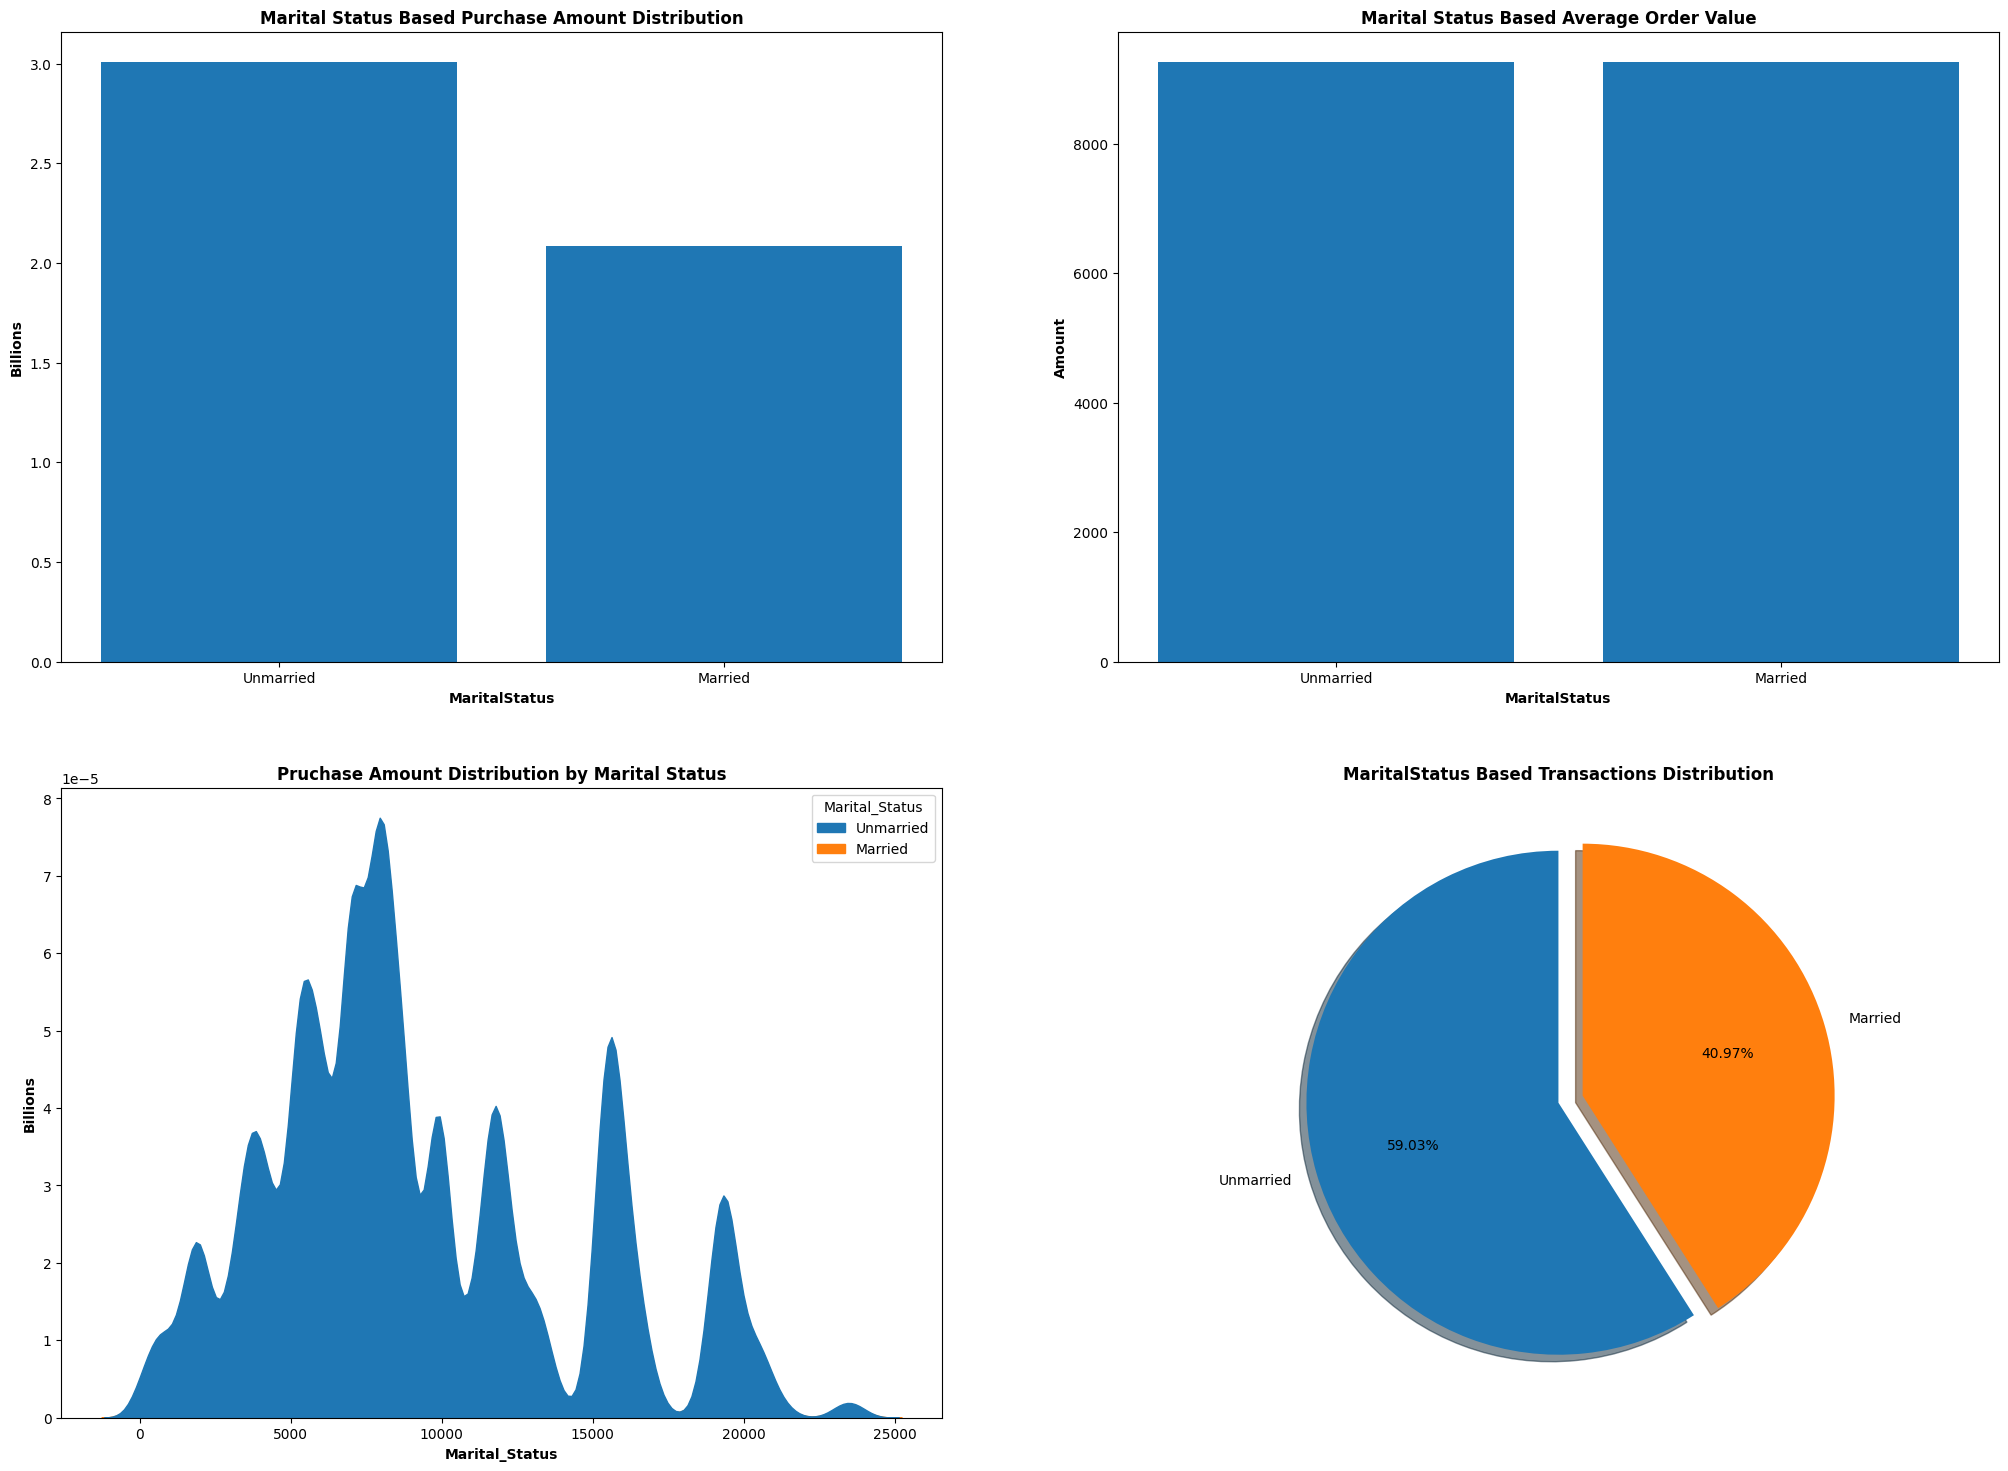

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (25,18))

plt.subplot(2,2,1)
plt.bar(temp["Marital_Status"],temp["sum"]/10**9)
plt.title("Marital Status Based Purchase Amount Distribution", fontweight = "bold", fontsize = 12)
plt.ylabel("Billions",fontweight = "bold", fontsize = 10)
plt.xlabel("MaritalStatus",fontweight = "bold", fontsize = 10)

plt.subplot(2,2,2)
plt.bar(temp["Marital_Status"],temp["per_purchase"])
plt.title("Marital Status Based Average Order Value", fontweight = "bold", fontsize = 12)
plt.ylabel("Amount",fontweight = "bold", fontsize = 10)
plt.xlabel("MaritalStatus",fontweight = "bold", fontsize = 10)

plt.subplot(2,2,3)
sns.kdeplot(data = walmart, x = 'Purchase', hue = 'Marital_Status',fill = True, alpha = 1)
plt.title("Pruchase Amount Distribution by Marital Status", fontweight = "bold", fontsize = 12)
plt.ylabel("Billions",fontweight = "bold", fontsize = 10)
plt.xlabel("Marital_Status",fontweight = "bold", fontsize = 10)

plt.subplot(2,2,4)
plt.pie(temp["count"], labels = temp["Marital_Status"], autopct = "%2.2f%%", shadow=True, startangle=90, explode = (0, 0.1))
plt.title("MaritalStatus Based Transactions Distribution", fontweight = "bold", fontsize = 12)
plt.show()
plt.subplots_adjust()

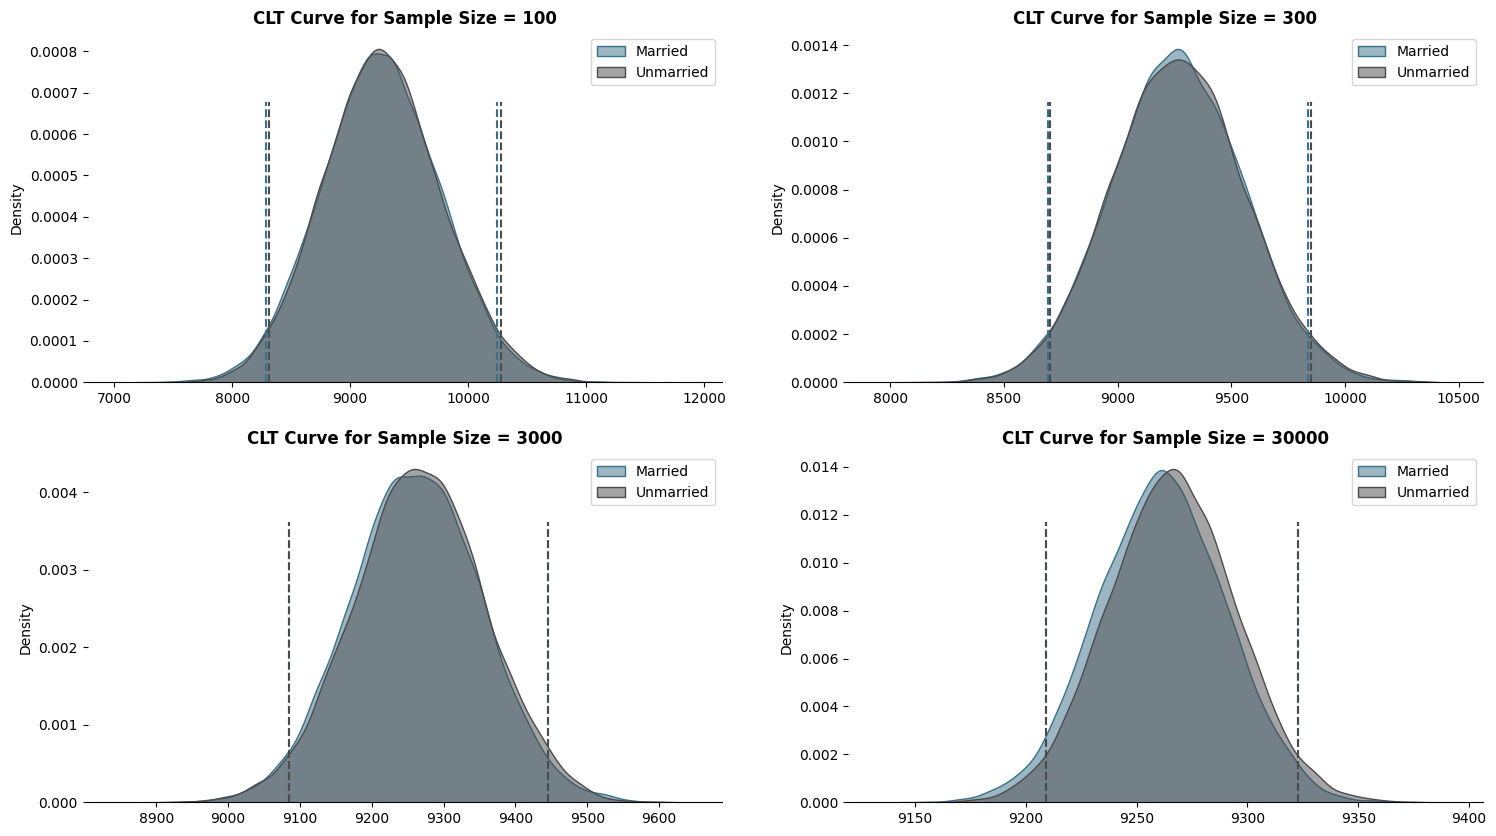

In [ ]:
##### Confidence Interval = 95
##### Sample Size = 100
plt.figure(figsize = (18,10))

samp_size = 100
ci = 95

walmart_married = walmart[walmart["Marital_Status"] == "Married"]["Purchase"]
walmart_unmarried = walmart[walmart["Marital_Status"] == "Unmarried"]["Purchase"]

married_samples_100 = []
unmarried_samples_100 = []

for i in range(0,20000):
  married_bootstrapped_means = np.mean(np.random.choice(walmart_married, size= samp_size))
  unmarried_bootstrapped_means = np.mean(np.random.choice(walmart_unmarried, size= samp_size))


  married_samples_100.append(round(married_bootstrapped_means))
  unmarried_samples_100.append(round(unmarried_bootstrapped_means))

plt.subplot(2,2,1)
sns.kdeplot(married_samples_100,color ="#3A7089" ,fill = True, alpha = 0.5,label = 'Married')
sns.kdeplot(unmarried_samples_100,color ="#4b4b4c" ,fill = True, alpha = 0.5,label = 'Unmarried')
plt.legend()
plt.title(f'CLT Curve for Sample Size = {samp_size}',fontsize = 12, fontweight = "bold")
for axis in ["left","top","right"]:
  plt.gca().spines[axis].set_visible(False)

interval_married_100 = np.percentile(married_samples_100, [(100-ci)/2, (100+ci)/2])
interval_unmarried_100 = np.percentile(unmarried_samples_100, [(100-ci)/2, (100+ci)/2])

for i in interval_married_100:
  plt.axvline(x = i, ymax = 0.8, color ='#3A7089', linestyle = "--")
for i in interval_unmarried_100:
  plt.axvline(x = i, ymax = 0.8, color ='#4b4b4c', linestyle = "--")


##### Confidence Interval = 95
##### Sample Size = 300

samp_size = 300
ci = 95

walmart_married = walmart[walmart["Marital_Status"] == "Married"]["Purchase"]
walmart_unmarried = walmart[walmart["Marital_Status"] == "Unmarried"]["Purchase"]

married_samples_300 = []
unmarried_samples_300 = []

for i in range(0,20000):
  married_bootstrapped_means = np.mean(np.random.choice(walmart_married, size= samp_size))
  unmarried_bootstrapped_means = np.mean(np.random.choice(walmart_unmarried, size= samp_size))


  married_samples_300.append(round(married_bootstrapped_means))
  unmarried_samples_300.append(round(unmarried_bootstrapped_means))

plt.subplot(2,2,2)
sns.kdeplot(married_samples_300,color ="#3A7089" ,fill = True, alpha = 0.5,label = 'Married')
sns.kdeplot(unmarried_samples_300,color ="#4b4b4c" ,fill = True, alpha = 0.5,label = 'Unmarried')
plt.legend()
plt.title(f'CLT Curve for Sample Size = {samp_size}',fontsize = 12, fontweight = "bold")
for axis in ["left","top","right"]:
  plt.gca().spines[axis].set_visible(False)

interval_married_300 = np.percentile(married_samples_300, [(100-ci)/2, (100+ci)/2])
interval_unmarried_300 = np.percentile(unmarried_samples_300, [(100-ci)/2, (100+ci)/2])

for i in interval_married_300:
  plt.axvline(x = i, ymax = 0.8, color ='#3A7089', linestyle = "--")
for i in interval_unmarried_300:
  plt.axvline(x = i, ymax = 0.8, color ='#4b4b4c', linestyle = "--")

##### Confidence Interval = 95
##### Sample Size = 3000
samp_size = 3000
ci = 95

walmart_married = walmart[walmart["Marital_Status"] == "Married"]["Purchase"]
walmart_unmarried = walmart[walmart["Marital_Status"] == "Unmarried"]["Purchase"]

married_samples_3000 = []
unmarried_samples_3000 = []

for i in range(0,20000):
  married_bootstrapped_means = np.mean(np.random.choice(walmart_married, size= samp_size))
  unmarried_bootstrapped_means = np.mean(np.random.choice(walmart_unmarried, size= samp_size))


  married_samples_3000.append(round(married_bootstrapped_means))
  unmarried_samples_3000.append(round(unmarried_bootstrapped_means))

plt.subplot(2,2,3)
sns.kdeplot(married_samples_3000,color ="#3A7089" ,fill = True, alpha = 0.5,label = 'Married')
sns.kdeplot(unmarried_samples_3000,color ="#4b4b4c" ,fill = True, alpha = 0.5,label = 'Unmarried')
plt.legend()
plt.title(f'CLT Curve for Sample Size = {samp_size}',fontsize = 12, fontweight = "bold")
for axis in ["left","top","right"]:
  plt.gca().spines[axis].set_visible(False)

interval_married_3000 = np.percentile(married_samples_3000, [(100-ci)/2, (100+ci)/2])
interval_unmarried_3000 = np.percentile(unmarried_samples_3000, [(100-ci)/2, (100+ci)/2])

for i in interval_unmarried_3000:
  plt.axvline(x = i, ymax = 0.8, color ='#3A7089', linestyle = "--")
for i in interval_unmarried_3000:
  plt.axvline(x = i, ymax = 0.8, color ='#4b4b4c', linestyle = "--")



##### Confidence Interval = 95
##### Sample Size = 30000

samp_size = 30000
ci = 95

walmart_married = walmart[walmart["Marital_Status"] == "Married"]["Purchase"]
walmart_unmarried = walmart[walmart["Marital_Status"] == "Unmarried"]["Purchase"]

married_samples_30000 = []
unmarried_samples_30000 = []

for i in range(0,20000):
  married_bootstrapped_means = np.mean(np.random.choice(walmart_married, size= samp_size))
  unmarried_bootstrapped_means = np.mean(np.random.choice(walmart_unmarried, size= samp_size))


  married_samples_30000.append(round(married_bootstrapped_means))
  unmarried_samples_30000.append(round(unmarried_bootstrapped_means))

plt.subplot(2,2,4)
sns.kdeplot(married_samples_30000,color ="#3A7089" ,fill = True, alpha = 0.5,label = 'Married')
sns.kdeplot(unmarried_samples_30000,color ="#4b4b4c" ,fill = True, alpha = 0.5,label = 'Unmarried')
plt.legend()
plt.title(f'CLT Curve for Sample Size = {samp_size}',fontsize = 12, fontweight = "bold")
for axis in ["left","top","right"]:
  plt.gca().spines[axis].set_visible(False)

interval_married_30000 = np.percentile(married_samples_30000, [(100-ci)/2, (100+ci)/2])
interval_unmarried_30000 = np.percentile(unmarried_samples_30000, [(100-ci)/2, (100+ci)/2])

for i in interval_unmarried_30000:
  plt.axvline(x = i, ymax = 0.8, color ='#3A7089', linestyle = "--")
for i in interval_unmarried_30000:
  plt.axvline(x = i, ymax = 0.8, color ='#4b4b4c', linestyle = "--")

In [ ]:
married_100_left , married_100_right = interval_married_100
unmarried_100_left , unmarried_100_right = interval_unmarried_100

married_300_left , married_300_right = interval_married_300
unmarried_300_left , unmarried_300_right = interval_unmarried_300

married_3000_left , married_3000_right = interval_married_3000
unmarried_3000_left , unmarried_3000_right = interval_unmarried_3000

married_30000_left , married_30000_right = interval_married_30000
unmarried_30000_left , unmarried_30000_right = interval_unmarried_30000

print("*"*100)
print("Sample Size 100")
print("*"*100)
print(f"Confidence Interval Married = {married_100_left} - {married_100_right.round(0)}")
print(f"Range = {(married_100_right - married_100_left).round(0)}")
print("-"*50)
print(f"Confidence Interval Unmarried = {unmarried_100_left} - {unmarried_100_right}")
print(f"Range = {unmarried_100_right - unmarried_100_left}")

print("\n\n")

print("*"*100)
print("Sample Size 300")
print("*"*100)
print(f"Confidence Interval Married = {married_300_left} - {married_300_right.round(0)}")
print(f"Range = {(married_300_right - married_300_left).round(0)}")
print("-"*50)
print(f"Confidence Interval Unmarried = {unmarried_300_left} - {unmarried_300_right}")
print(f"Range = {unmarried_300_right - unmarried_300_left}")

print("\n\n")

print("*"*100)
print("Sample Size 3000")
print("*"*100)
print(f"Confidence Interval Married = {married_3000_left} - {married_3000_right.round(0)}")
print(f"Range = {(married_3000_right - married_3000_left).round(0)}")
print("-"*50)
print(f"Confidence Interval Unmarried = {unmarried_3000_left} - {unmarried_3000_right}")
print(f"Range = {unmarried_3000_right - unmarried_3000_left}")

print("\n\n")

print("*"*100)
print("Sample Size 30000")
print("*"*100)
print(f"Confidence Interval Married = {married_30000_left} - {married_30000_right.round(0)}")
print(f"Range = {(married_30000_right - married_30000_left).round(0)}")
print("-"*50)
print(f"Confidence Interval Unmarried = {unmarried_30000_left} - {unmarried_30000_right}")
print(f"Range = {unmarried_30000_right - unmarried_30000_left}")


****************************************************************************************************
Sample Size 100
****************************************************************************************************
Confidence Interval Married = 8283.0 - 10248.0
Range = 1965.0
--------------------------------------------------
Confidence Interval Unmarried = 8309.975 - 10282.024999999998
Range = 1972.0499999999975



****************************************************************************************************
Sample Size 300
****************************************************************************************************
Confidence Interval Married = 8694.0 - 9838.0
Range = 1144.0
--------------------------------------------------
Confidence Interval Unmarried = 8703.0 - 9849.0
Range = 1146.0



****************************************************************************************************
Sample Size 3000
***************************************************************

Insights
1. Sample Size

The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals

From the above analysis, we can see that the confidence interval overlap for all the sample sizes. This means that there is no statistically significant difference between the average spending per transaction for married and unmarried customers within the given samples.
3. Population Average

We are 95% confident that the true population average for married customers falls between 9,217 and 9,305, and for unmarried customers, it falls between $9,222 and 9,311.
4. Both the customers spend equal

The overlapping confidence intervals of average spending for married and unmarried customers indicate that both married and unmarried customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.
5. How can Walmart leverage this conclusion to make changes or improvements?
5.1. Marketing Resources

Walmart may not need to allocate marketing resources specifically targeting one group over the other. Instead, they can focus on broader marketing strategies that appeal to both groups.

# **Customer Age VS Purchase Amount**

In [ ]:
#creating a df for purchase amount vs age group
temp = walmart.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


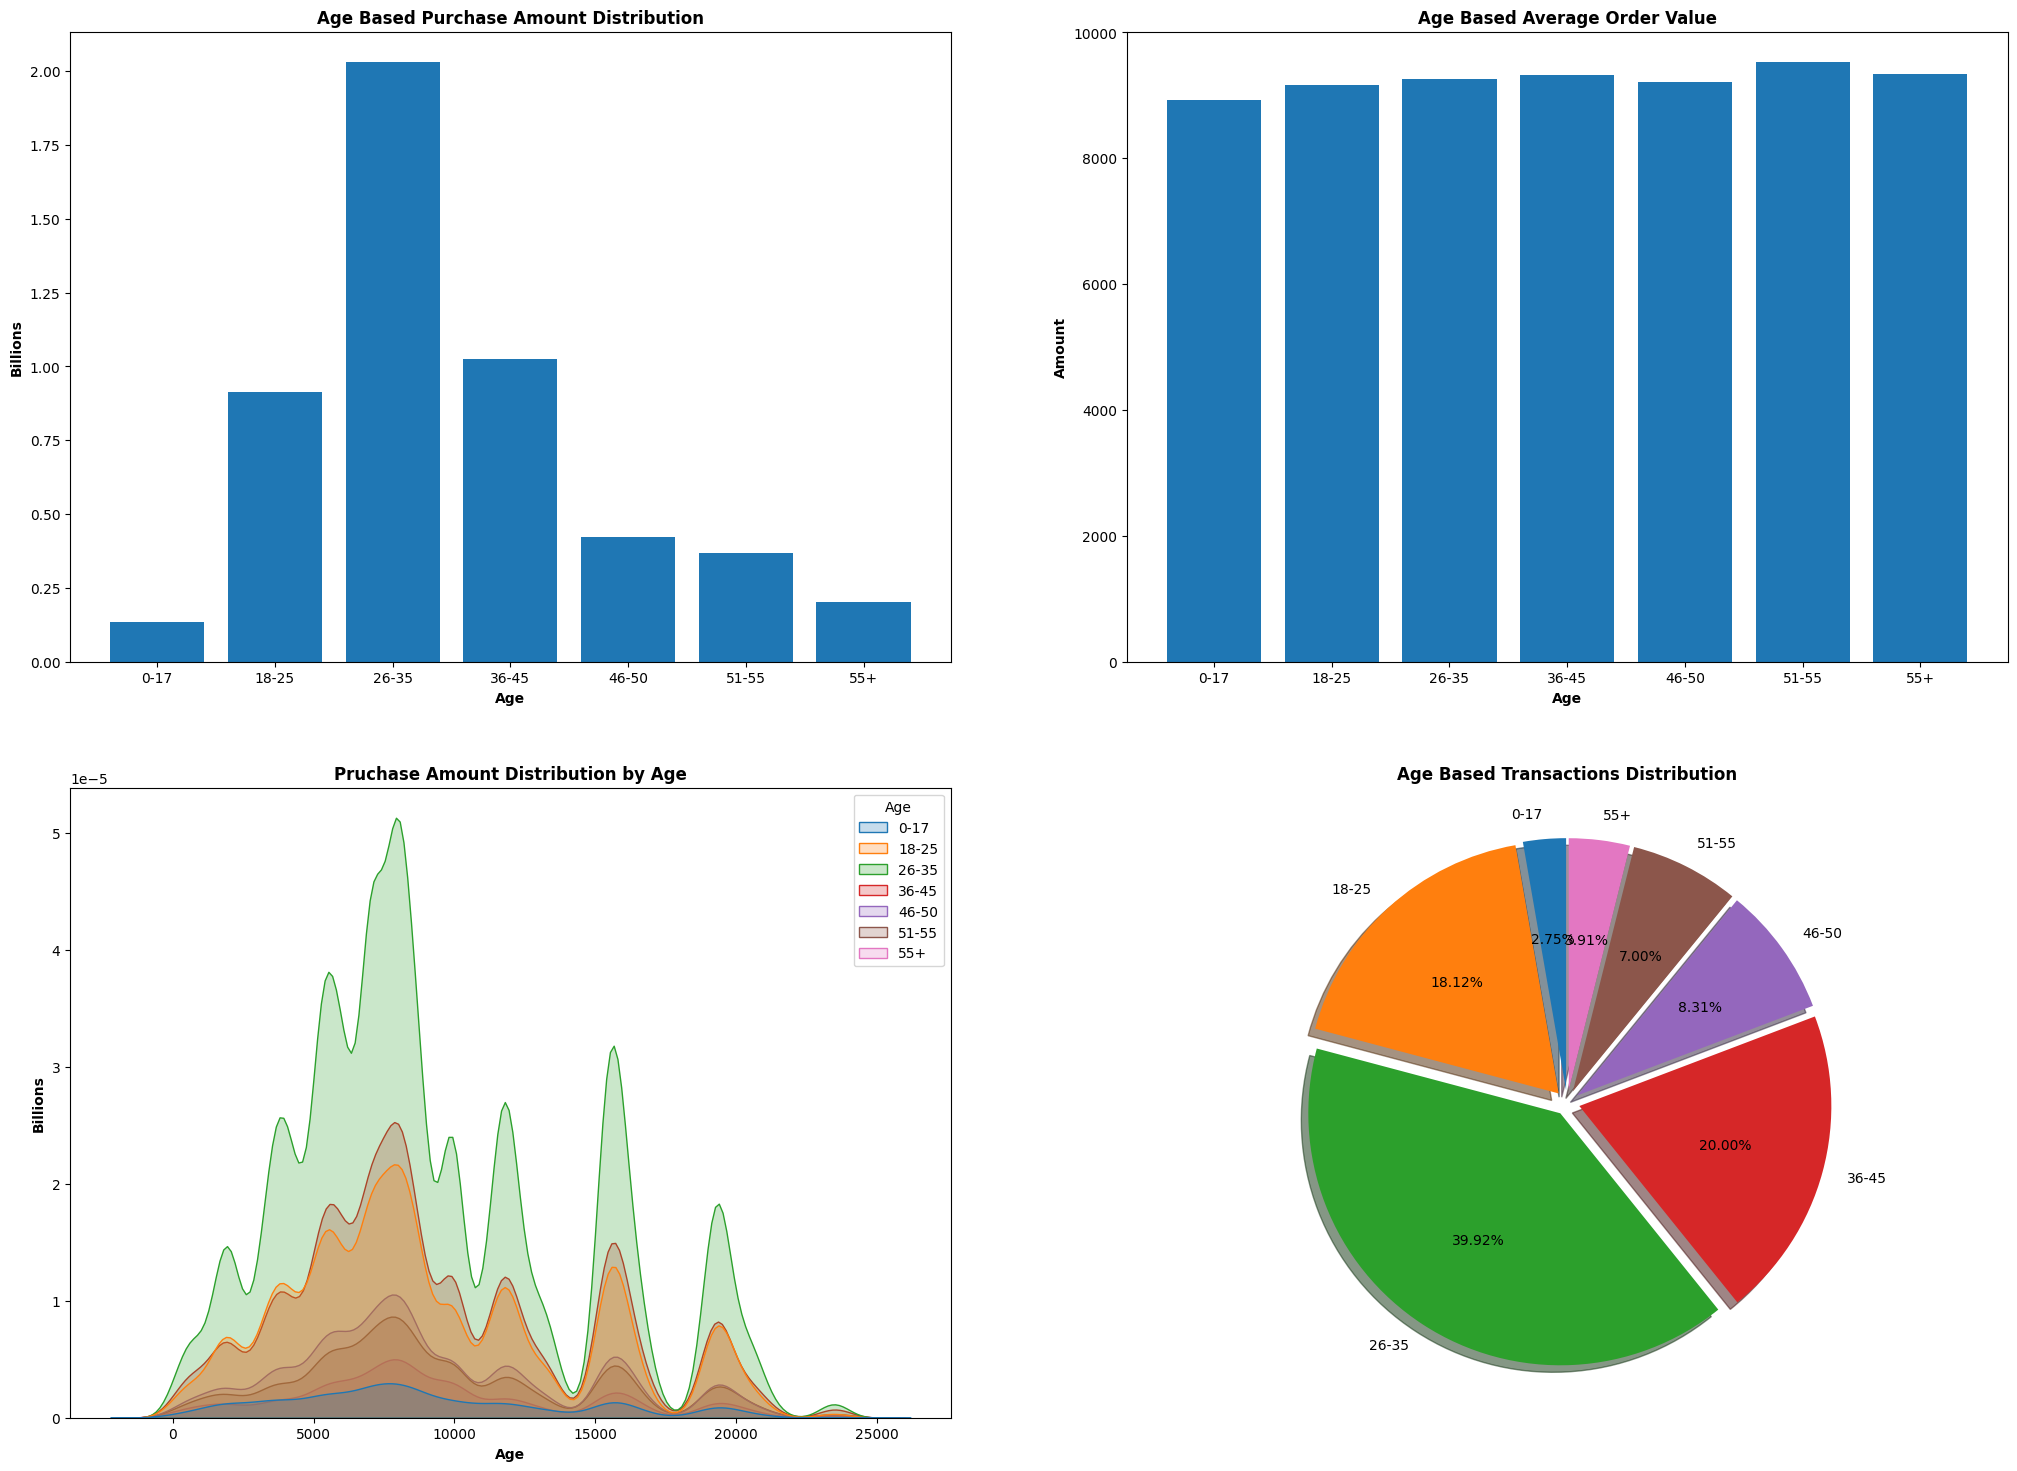

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (25,18))

plt.subplot(2,2,1)
plt.bar(temp["Age"],temp["sum"]/10**9)
plt.title("Age Based Purchase Amount Distribution", fontweight = "bold", fontsize = 12)
plt.ylabel("Billions",fontweight = "bold", fontsize = 10)
plt.xlabel("Age",fontweight = "bold", fontsize = 10)

plt.subplot(2,2,2)
plt.bar(temp["Age"],temp["per_purchase"])
plt.title("Age Based Average Order Value", fontweight = "bold", fontsize = 12)
plt.ylabel("Amount",fontweight = "bold", fontsize = 10)
plt.xlabel("Age",fontweight = "bold", fontsize = 10)

plt.subplot(2,2,3)
sns.kdeplot(data = walmart, x = 'Purchase', hue = 'Age',fill = True, alpha = 0.25)
plt.title("Pruchase Amount Distribution by Age", fontweight = "bold", fontsize = 12)
plt.ylabel("Billions",fontweight = "bold", fontsize = 10)
plt.xlabel("Age",fontweight = "bold", fontsize = 10)

plt.subplot(2,2,4)
plt.pie(temp["count"], labels = temp["Age"], autopct = "%2.2f%%", shadow=True, startangle=90, explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05))
plt.title("Age Based Transactions Distribution", fontweight = "bold", fontsize = 12)
plt.show()
plt.subplots_adjust()

In [ ]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2

    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

In [ ]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(4,1)

    #creating separate data frames

    df_1 = walmart.loc[walmart['Age'] == '0-17','Purchase']
    df_2 = walmart.loc[walmart['Age'] == '18-25','Purchase']
    df_3 = walmart.loc[walmart['Age'] == '26-35','Purchase']
    df_4 = walmart.loc[walmart['Age'] == '36-45','Purchase']
    df_5 = walmart.loc[walmart['Age'] == '46-50','Purchase']
    df_6 = walmart.loc[walmart['Age'] == '51-55','Purchase']
    df_7 = walmart.loc[walmart['Age'] == '55+','Purchase']


    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0),(300,1),(3000,2),(30000,3)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}

    for i,x in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            bootstrapped_samples_1 = np.random.choice(df_1,size = i)
            bootstrapped_samples_2 = np.random.choice(df_2,size = i)
            bootstrapped_samples_3 = np.random.choice(df_3,size = i)
            bootstrapped_samples_4 = np.random.choice(df_4,size = i)
            bootstrapped_samples_5 = np.random.choice(df_5,size = i)
            bootstrapped_samples_6 = np.random.choice(df_6,size = i)
            bootstrapped_samples_7 = np.random.choice(df_7,size = i)

            #calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)

            #appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        #storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7


        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x])

        #plots
        for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#7A9D54', '51-55'),('#9EB384', '55+')]:

            sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return samples1,samples2,samples3,samples4,samples5,samples6,samples7

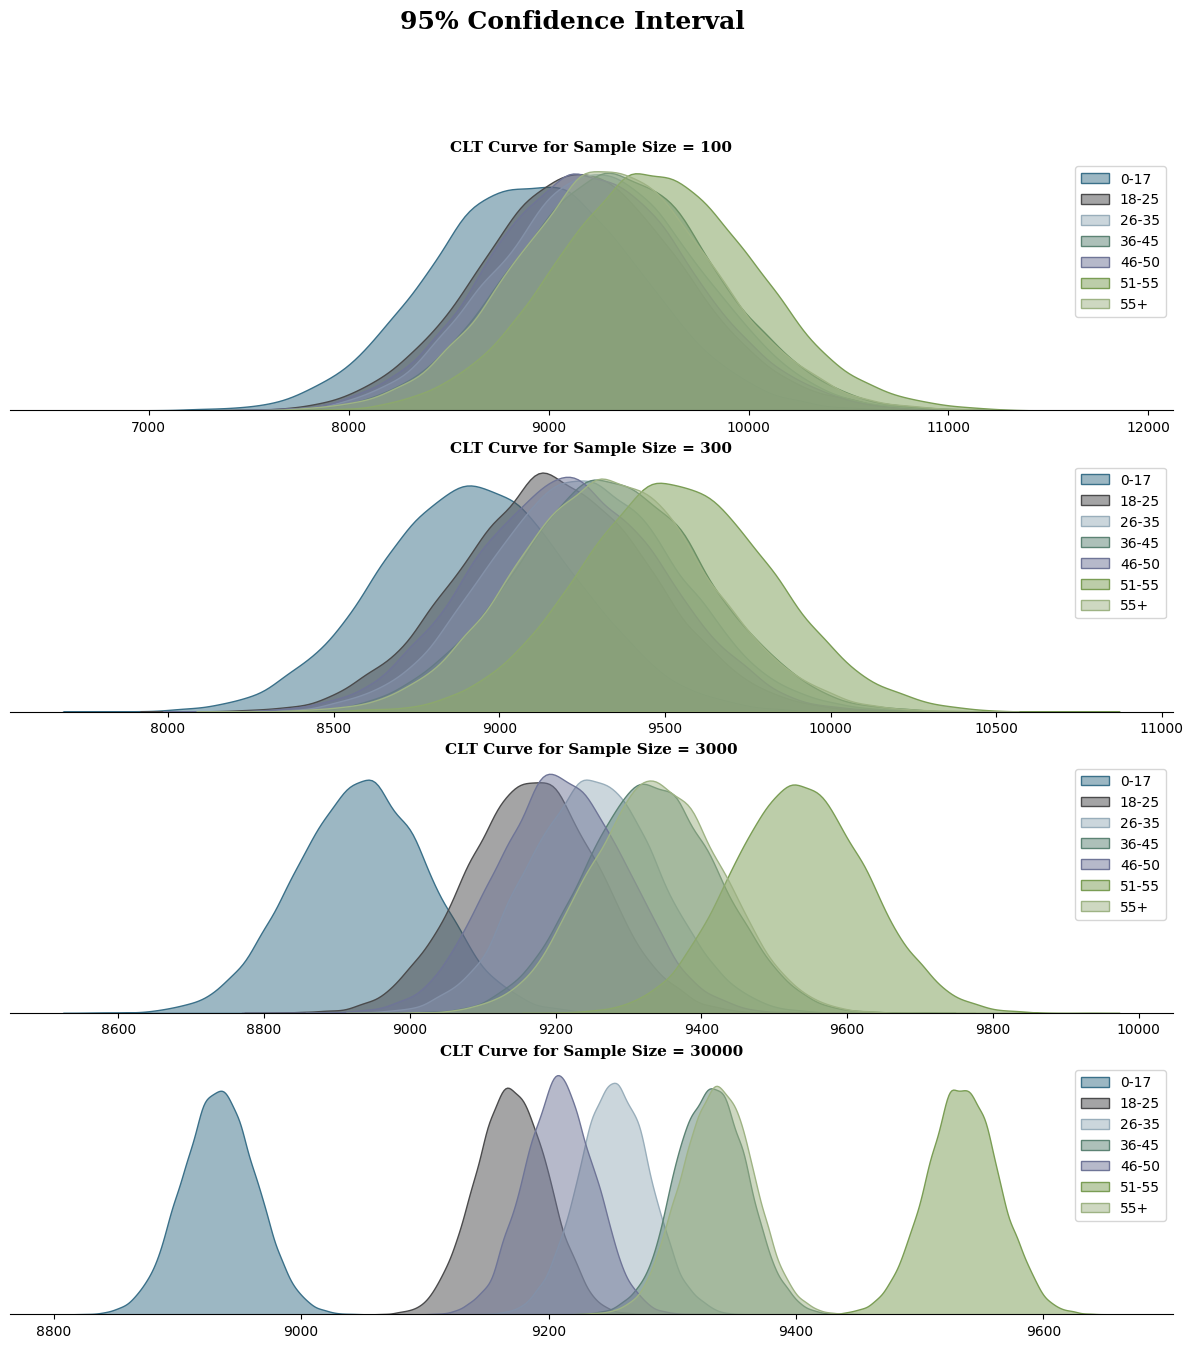

In [ ]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

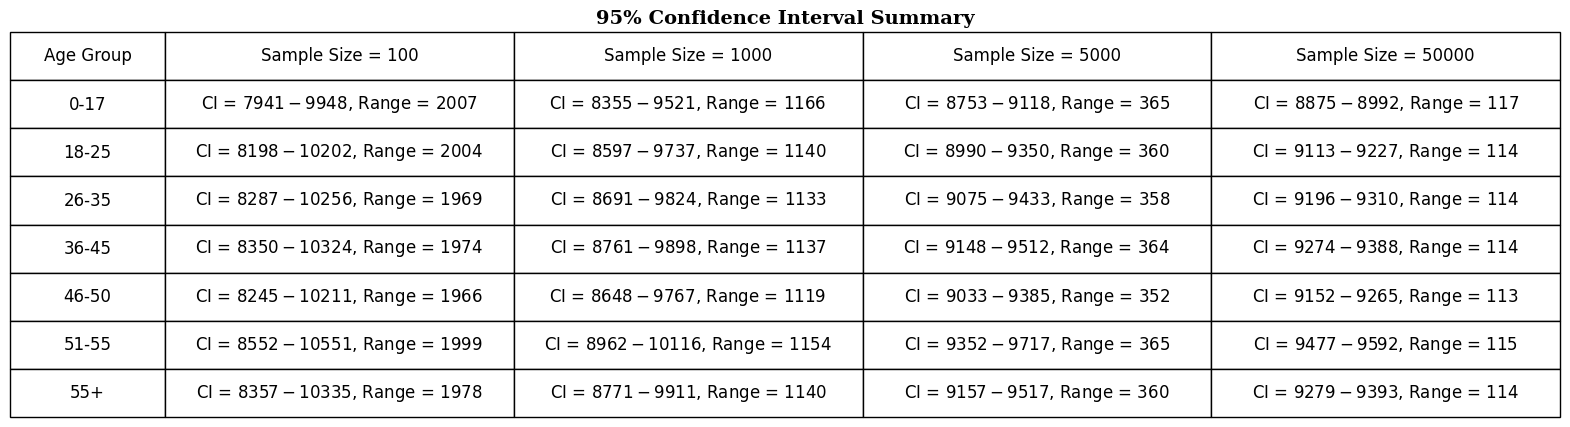

In [ ]:

fig,ax = plt.subplots(figsize = (20,5))
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']
samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]

for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")

ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Age Group','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)
ax.axis('off')
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})
plt.show()

Insights
1. Sample Size

The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals and customer spending patterns

From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups -
0 - 17 - Customers in this age group have the lowest spending per transaction
18 - 25, 26 - 35, 46 - 50 - Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics
36 - 45, 55+ - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns
51 - 55 - Customers in this age group have the highest spending per transaction
3. Population Average

We are 95% confident that the true population average for following age groups falls between the below range -

0 - 17 =  8,888 to 8,979
18 - 25 =  9,125 to 9,213
26 - 35 =  9,209 to 9,297
36 - 45 =  9,288 to 9,376
46 - 50 =  9,165 to 9,253
51 - 55 =  9,490 to 9,579
55+ =  9,292 to 9,381
4. How can Walmart leverage this conclusion to make changes or improvements?
4.1. Targeted Marketing

Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. Walmart can also tailor their product selection and marketing strategies to appeal to the preferences and needs of this age group
4.2. Customer Segmentation

Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.
4.3 Premium Services

Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. This might involve offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.

# **Recommendations**

**1.Target Male Shoppers**
- Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

**2. Focus on 26 - 45 Age Group**
-  With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could include offering exclusive deals on products that are popular among this age group.

**3. Engage Younger Shoppers**
- Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

**4. Customer Segmentation**
- Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

**5. Enhance the 51 - 55 Age Group Shopping Experience**
- Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 - 55 age group.

**6. Post-Black Friday Engagement**
- After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.